## Importación de librerías

In [1]:
from sklearn.cluster import KMeans

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from datetime import date, time, datetime, timedelta

## Carga de datos

In [2]:
# Vanos a revisar la información del dataset
info = open('marketing_campaign-2.txt')
print('La información del dataset es: ')
print(info.read())

La información del dataset es: 
AcceptedCmp1 - 1 if customer accepted the offer in the 1st campaign, 0 otherwise
AcceptedCmp2 - 1 if customer accepted the offer in the 2nd campaign, 0 otherwise
AcceptedCmp3 - 1 if customer accepted the offer in the 3rd campaign, 0 otherwise
AcceptedCmp4 - 1 if customer accepted the offer in the 4th campaign, 0 otherwise
AcceptedCmp5 - 1 if customer accepted the offer in the 5th campaign, 0 otherwise
Response (target) - 1 if customer accepted the offer in the last campaign, 0 otherwise
Complain - 1 if customer complained in the last 2 years
DtCustomer - date of customer’s enrolment with the company
Education - customer’s level of education
Marital - customer’s marital status
Kidhome - number of small children in customer’s household
 Teenhome - number of teenagers in customer’s household
 Income - customer’s yearly household income
MntFishProducts - amount spent on fish products in the last 2 years
MntMeatProducts - amount spent on meat products in the 

In [3]:
# Datos en bruto
df_marketing = pd.read_csv('marketing_campaign.csv', sep="\t", index_col='ID')
df_marketing.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [4]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Year_Birth           2240 non-null   int64  
 1   Education            2240 non-null   object 
 2   Marital_Status       2240 non-null   object 
 3   Income               2216 non-null   float64
 4   Kidhome              2240 non-null   int64  
 5   Teenhome             2240 non-null   int64  
 6   Dt_Customer          2240 non-null   object 
 7   Recency              2240 non-null   int64  
 8   MntWines             2240 non-null   int64  
 9   MntFruits            2240 non-null   int64  
 10  MntMeatProducts      2240 non-null   int64  
 11  MntFishProducts      2240 non-null   int64  
 12  MntSweetProducts     2240 non-null   int64  
 13  MntGoldProds         2240 non-null   int64  
 14  NumDealsPurchases    2240 non-null   int64  
 15  NumWebPurchases      2240 non-null   int

In [5]:
#Corregimos la variable Dt_customer a formato datetime y transformamos algunas variables en boleanas
df_marketing['Dt_Customer'] = pd.to_datetime(df_marketing['Dt_Customer'], format='%d-%m-%Y', errors='coerce')
df_marketing['AcceptedCmp1'] = df_marketing['AcceptedCmp1'].astype(bool)
df_marketing['AcceptedCmp2'] = df_marketing['AcceptedCmp1'].astype(bool)
df_marketing['AcceptedCmp3'] = df_marketing['AcceptedCmp1'].astype(bool)
df_marketing['AcceptedCmp4'] = df_marketing['AcceptedCmp1'].astype(bool)
df_marketing['AcceptedCmp5'] = df_marketing['AcceptedCmp1'].astype(bool)
df_marketing['Response'] = df_marketing['Response'].astype(bool)
df_marketing['Complain'] = df_marketing['Complain'].astype(bool)

In [6]:
#Comprobamos que los datos se hayan cambiado correctamente
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2240 entries, 5524 to 9405
Data columns (total 28 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2240 non-null   int64         
 1   Education            2240 non-null   object        
 2   Marital_Status       2240 non-null   object        
 3   Income               2216 non-null   float64       
 4   Kidhome              2240 non-null   int64         
 5   Teenhome             2240 non-null   int64         
 6   Dt_Customer          2240 non-null   datetime64[ns]
 7   Recency              2240 non-null   int64         
 8   MntWines             2240 non-null   int64         
 9   MntFruits            2240 non-null   int64         
 10  MntMeatProducts      2240 non-null   int64         
 11  MntFishProducts      2240 non-null   int64         
 12  MntSweetProducts     2240 non-null   int64         
 13  MntGoldProds         2240 non-null 

In [7]:
# Verifico la cantidad de datos que hay en los dataset
print('Cantidad de datos:')
print(df_marketing.shape)

Cantidad de datos:
(2240, 28)


In [8]:
df_marketing.isna().sum()

Year_Birth              0
Education               0
Marital_Status          0
Income                 24
Kidhome                 0
Teenhome                0
Dt_Customer             0
Recency                 0
MntWines                0
MntFruits               0
MntMeatProducts         0
MntFishProducts         0
MntSweetProducts        0
MntGoldProds            0
NumDealsPurchases       0
NumWebPurchases         0
NumCatalogPurchases     0
NumStorePurchases       0
NumWebVisitsMonth       0
AcceptedCmp3            0
AcceptedCmp4            0
AcceptedCmp5            0
AcceptedCmp1            0
AcceptedCmp2            0
Complain                0
Z_CostContact           0
Z_Revenue               0
Response                0
dtype: int64

In [9]:
# Borramos los datos nulos en income
df_marketing.dropna(inplace=True)

## Exploración de datos

In [10]:
#Añadimos una nueva columna que determinará la edad
df_marketing['Age'] = datetime.today().year
df_marketing['Age'] = df_marketing['Age']-df_marketing['Year_Birth']

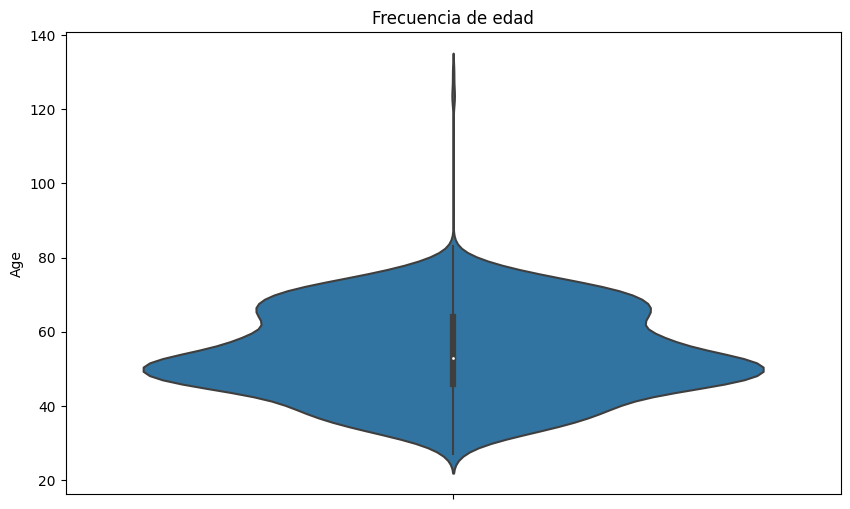

In [11]:
plt.figure(figsize=(10,6))
plt.title("Frecuencia de edad")
sns.axes_style("dark")
sns.violinplot(y = df_marketing["Age"])
plt.show()

Como podemos observar, hay encuestados demasiado longevos, vamos a comprobar el motivo

In [12]:
anios = df_marketing.Year_Birth.unique()
anios.sort()
anios

array([1893, 1899, 1900, 1940, 1941, 1943, 1944, 1945, 1946, 1947, 1948,
       1949, 1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959,
       1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969, 1970,
       1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981,
       1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992,
       1993, 1994, 1995, 1996])

Parece ser un error, pues parece ser que la persona que ha introducido datos en fechas, por ejem 1893 se ha confundido.
En realidad, querría decir 1983

In [13]:
#Vamos a corregir esos datos
#Vamos a crear una nueva columna para guardar el nuevo año
df_marketing['Year_Birth_corr'] = df_marketing['Year_Birth'].astype(str)
#Vamos a crear el filtro para que nos indique los años menores que 1900
filtro = df_marketing['Year_Birth'] < 1900
#Creamos un bucle que corrija el error en esos valores
for i in range(df_marketing[filtro].shape[0]):
    indice = (df_marketing[filtro].index)[i]
    df_marketing.loc[indice, 'Year_Birth_corr'] = "19"+((
        df_marketing['Year_Birth_corr'].str.slice(1,2))[indice]) + ((
            df_marketing['Year_Birth_corr'].str.slice(3,4))[indice])
#Convertimos el año a una variable entera
df_marketing['Year_Birth_corr']= df_marketing['Year_Birth_corr'].astype(int)
#Sustituimos la variable año
df_marketing['Year_Birth'] = df_marketing['Year_Birth_corr']
#Eliminamos la columna Newprice, porque ya no la necesitamos
df_marketing.pop('Year_Birth_corr')

ID
5524     1957
2174     1954
4141     1965
6182     1984
5324     1981
         ... 
10870    1967
4001     1946
7270     1981
8235     1956
9405     1954
Name: Year_Birth_corr, Length: 2216, dtype: int64

In [14]:
# Corregimos la edad
df_marketing['Age'] = datetime.today().year
df_marketing['Age'] = df_marketing['Age']-df_marketing['Year_Birth']

In [15]:
#Con la edad corregida, eliminamos las personas mayores de 100 años, puesto que seguro habrán fallecido
df_marketing = df_marketing[df_marketing['Age'] < 100]

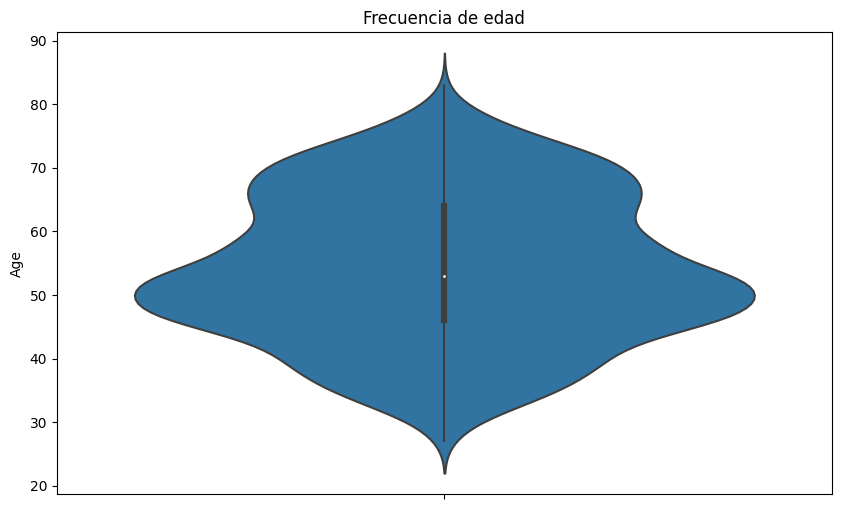

In [16]:
#Volvemos a observar el violinplot
plt.figure(figsize=(10,6))
plt.title("Frecuencia de edad")
sns.axes_style("dark")
sns.violinplot(y = df_marketing["Age"])
plt.show()

In [17]:
df_marketing.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2215 entries, 5524 to 9405
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Year_Birth           2215 non-null   int64         
 1   Education            2215 non-null   object        
 2   Marital_Status       2215 non-null   object        
 3   Income               2215 non-null   float64       
 4   Kidhome              2215 non-null   int64         
 5   Teenhome             2215 non-null   int64         
 6   Dt_Customer          2215 non-null   datetime64[ns]
 7   Recency              2215 non-null   int64         
 8   MntWines             2215 non-null   int64         
 9   MntFruits            2215 non-null   int64         
 10  MntMeatProducts      2215 non-null   int64         
 11  MntFishProducts      2215 non-null   int64         
 12  MntSweetProducts     2215 non-null   int64         
 13  MntGoldProds         2215 non-null 

Vamos a crear una nueva columna con el total de gastos. Para ello, tomaremos las siguientes variables:
- MntFishProducts - amount spent on fish products in the last 2 years
- MntMeatProducts - amount spent on meat products in the last 2 years
- MntFruits - amount spent on fruits products in the last 2 years
- MntSweetProducts - amount spent on sweet products in the last 2 years
- MntWines - amount spent on wine products in the last 2 years
- MntGoldProds - amount spent on gold products in the last 2 years

In [18]:
df_marketing['Spendings'] = df_marketing['MntFishProducts'] + df_marketing['MntMeatProducts'] + df_marketing[
    'MntFruits'] + df_marketing['MntSweetProducts'] + df_marketing['MntWines'] + df_marketing['MntGoldProds']

Además, calcularemos el porcentaje de gastos que destina cada individuo a cada producto en función del gasto total

In [19]:
# Calculamos el porcentaje de los gastos destinados por cada cliente a cada tipo de producto:
df_marketing['porc_Fish'] = round(((df_marketing['MntFishProducts']/df_marketing['Spendings'])*100), 2)
df_marketing['porc_Meat'] = round(((df_marketing['MntMeatProducts']/df_marketing['Spendings'])*100), 2)
df_marketing['porc_Fruits'] = round(((df_marketing['MntFruits']/df_marketing['Spendings'])*100), 2)
df_marketing['porc_Sweet'] = round(((df_marketing['MntSweetProducts']/df_marketing['Spendings'])*100), 2)
df_marketing['porc_Wine'] = round(((df_marketing['MntWines']/df_marketing['Spendings'])*100), 2)
df_marketing['porc_Gold'] = round(((df_marketing['MntGoldProds']/df_marketing['Spendings'])*100), 2)

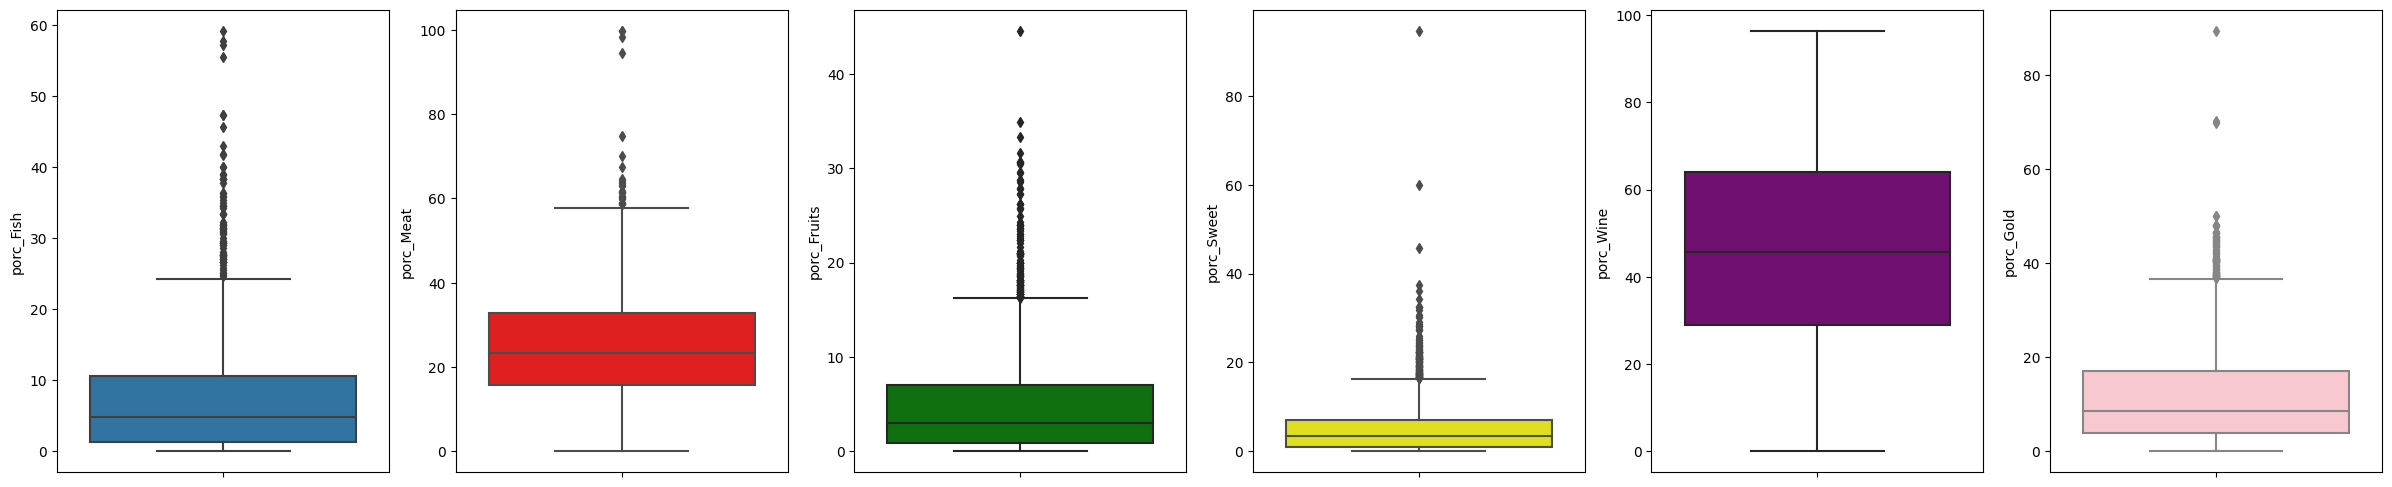

In [21]:
plt.figure(figsize=(30,6))
plt.subplot(1,6,1)
sns.boxplot(y = df_marketing["porc_Fish"])
plt.subplot(1,6,2)
sns.boxplot(y = df_marketing["porc_Meat"], color='red')
plt.subplot(1,6,3)
sns.boxplot(y = df_marketing["porc_Fruits"], color='green')
plt.subplot(1,6,4)
sns.boxplot(y = df_marketing["porc_Sweet"], color='yellow')
plt.subplot(1,6,5)
sns.boxplot(y = df_marketing["porc_Wine"], color='purple')
plt.subplot(1,6,6)
sns.boxplot(y = df_marketing["porc_Gold"], color='pink')
plt.show()

Existen datos atípicos que, de momento no borramos.

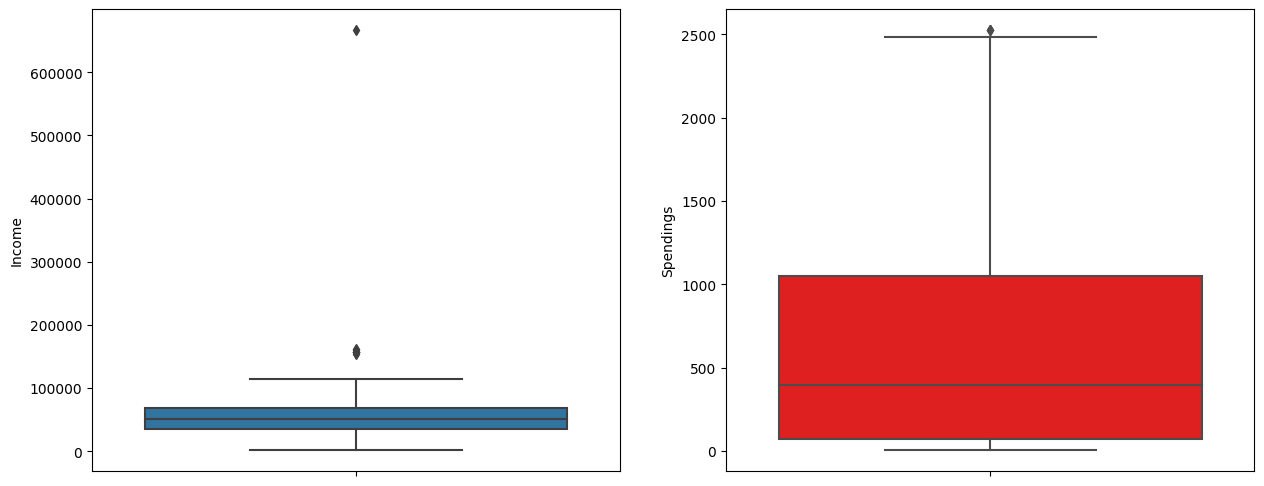

In [ ]:
plt.figure(figsize=(15,6))
plt.subplot(1,2,1)
sns.boxplot(y = df_marketing["Income"])
plt.subplot(1,2,2)
sns.boxplot(y = df_marketing["Spendings"], color="red")
plt.show()

De momento, no vamos a eliminar los atípicos. Puede que haya alguna persona de clase alta que viva en esa zona

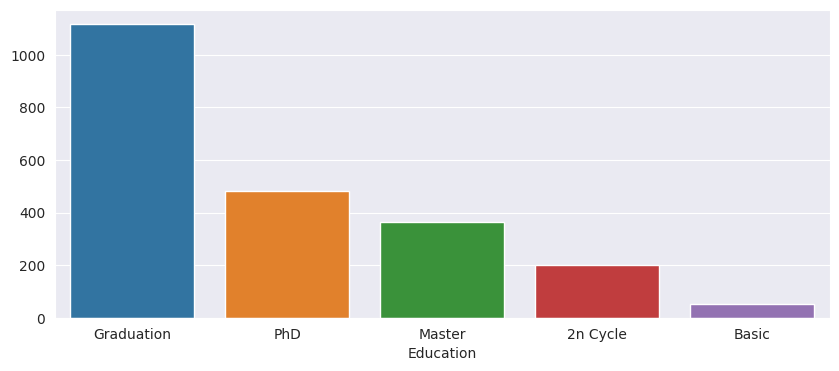

In [ ]:
Education = df_marketing['Education'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x = Education.index, y = Education.values)
plt.show()

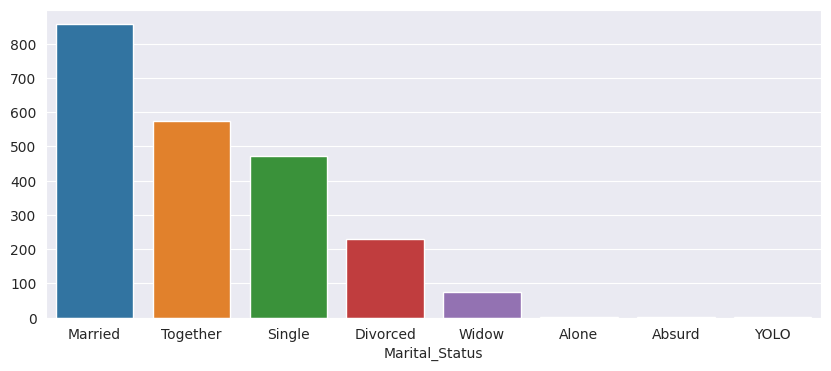

In [ ]:
Marital_Status = df_marketing['Marital_Status'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x = Marital_Status.index, y = Marital_Status.values)
plt.show()

A la vista de los datos, vamos a cambiar la respuesta Alone por Single. Absurd y Yolo lo meteremos dentro de una categoría llamada Notanswered

In [ ]:
def maritalcorr(x):
    if x == 'YOLO':
        return 'Notanswered'
    elif x == 'Absurd':
        return 'Notanswered'
    elif x == 'Alone':
        return 'Single'
    else:
        return x
df_marketing['Marital_Status']=df_marketing['Marital_Status'].apply(maritalcorr)

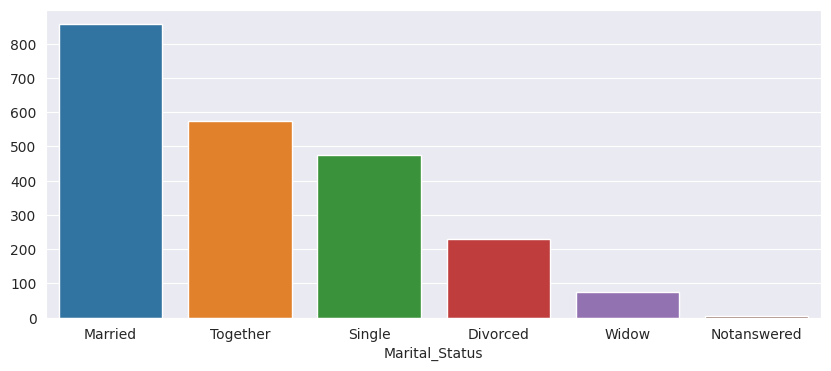

In [ ]:
# Repetimos el gráfico
Marital_Status = df_marketing['Marital_Status'].value_counts()
sns.set_style("darkgrid")
plt.figure(figsize=(10,4))
sns.barplot(x = Marital_Status.index, y = Marital_Status.values)
plt.show()

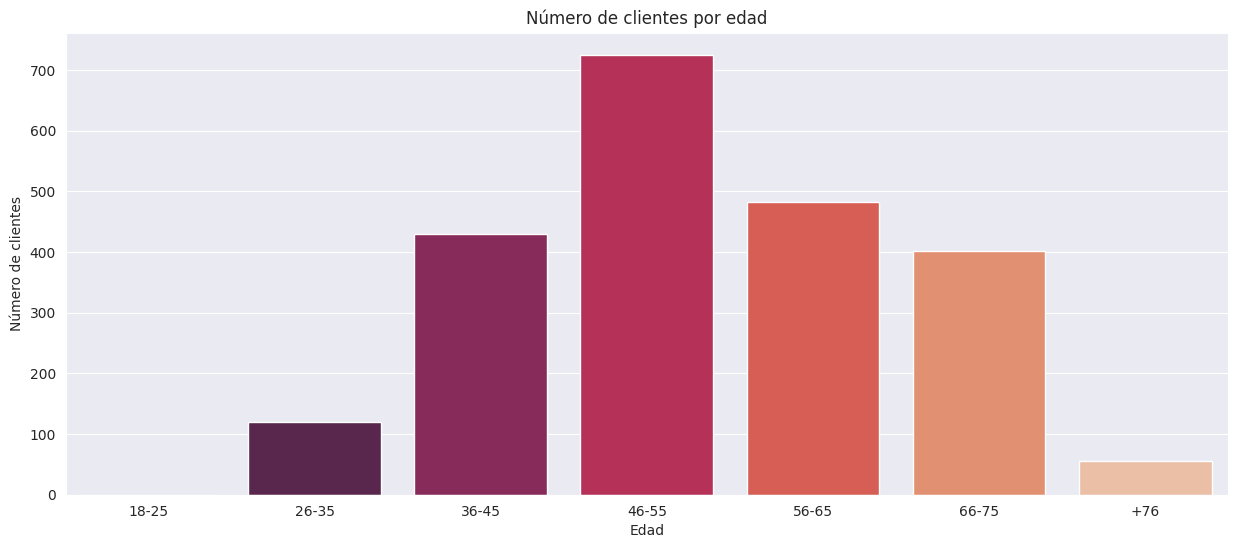

In [ ]:
age18_25 = df_marketing.Age[(df_marketing.Age <= 25) & (df_marketing.Age >= 18)]
age26_35 = df_marketing.Age[(df_marketing.Age <= 35) & (df_marketing.Age >= 26)]
age36_45 = df_marketing.Age[(df_marketing.Age <= 45) & (df_marketing.Age >= 36)]
age46_55 = df_marketing.Age[(df_marketing.Age <= 55) & (df_marketing.Age >= 46)]
age56_65 = df_marketing.Age[(df_marketing.Age <= 65) & (df_marketing.Age >= 56)]
age66_75 = df_marketing.Age[(df_marketing.Age <= 75) & (df_marketing.Age >= 66)]
age75above = df_marketing.Age[df_marketing.Age >= 76]

x = ["18-25","26-35","36-45","46-55","56-65","66-75","+76"]
y = [len(age18_25.values),len(age26_35.values),len(age36_45.values),len(age46_55.values),len(age56_65.values),len(age66_75.values),len(age75above)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Número de clientes por edad")
plt.xlabel("Edad")
plt.ylabel("Número de clientes")
plt.show()

También vamos a crear otra variable para ver los hijos totales del domicilio familiar (niños y adolescentes)

In [ ]:
df_marketing['Offspringhome'] = df_marketing['Kidhome'] + df_marketing['Teenhome']

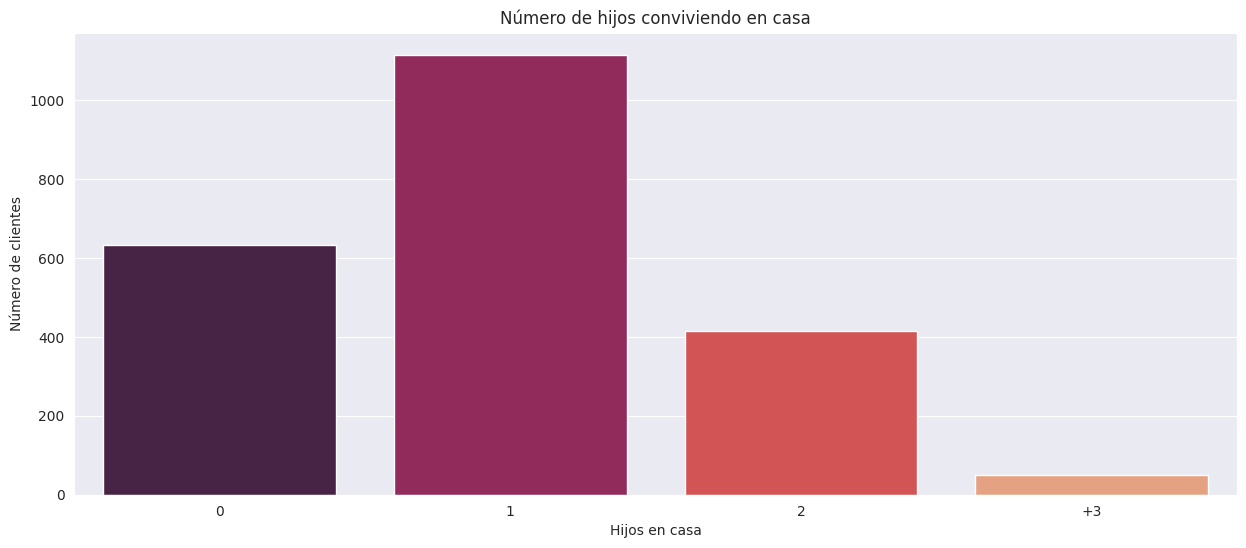

In [ ]:
Nochildrenhome = df_marketing.Offspringhome[df_marketing.Offspringhome == 0]
Onechildhome = df_marketing.Offspringhome[df_marketing.Offspringhome == 1]
Twochildrenhome = df_marketing.Offspringhome[df_marketing.Offspringhome == 2]
Threeomorechildrenhome = df_marketing.Offspringhome[df_marketing.Offspringhome > 2]

x = ["0","1","2","+3"]
y = [len(Nochildrenhome.values),len(Onechildhome.values),len(Twochildrenhome.values),len(Threeomorechildrenhome.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Número de hijos conviviendo en casa")
plt.xlabel("Hijos en casa")
plt.ylabel("Número de clientes")
plt.show()

También sería interesante calcular el número de años que lleva siendo cliente cada individuo

In [ ]:
# Añadimos nueva columna que nos indique cuantos años lleva siendo cliente
df_marketing['Years_customer'] = datetime.today()
df_marketing['Years_customer'] = (df_marketing['Years_customer']-df_marketing['Dt_Customer'])
df_marketing['Years_customer'] = pd.to_numeric(df_marketing['Years_customer'].dt.days, downcast='integer')
#Vamos a dejarla en float en lugar de int, porque, por ejemplo no es lo mismo ser cliente desde un año, que serlo desde año y medio
df_marketing['Years_customer'] = df_marketing['Years_customer'].astype(float)
df_marketing['Years_customer'] = df_marketing['Years_customer']/365
df_marketing['Years_customer'] = round(df_marketing['Years_customer'], 2)

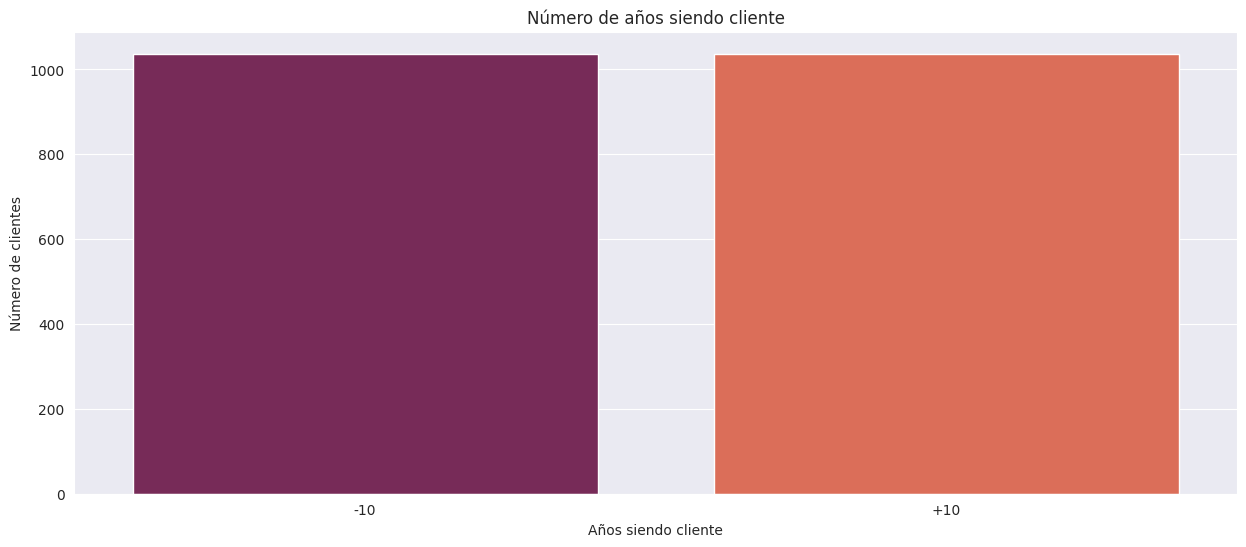

In [ ]:
Customerlessthan10 = df_marketing.Years_customer[df_marketing.Years_customer > 10]
Customer10yearsormore = df_marketing.Years_customer[df_marketing.Years_customer > 10]

x = ["-10","+10"]
y = [len(Customerlessthan10.values),len(Customer10yearsormore.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=x, y=y, palette="rocket")
plt.title("Número de años siendo cliente")
plt.xlabel("Años siendo cliente")
plt.ylabel("Número de clientes")
plt.show()

Por último, vamos a calcular el porcentaje de compras realizadas a través de cada canal

In [ ]:
# Vamos a calcular el porcentaje de las compras realizadas en tienda física, online y a través de catálogo
# Primero calculamos el total de las compras
df_marketing['Total_purchases'] = df_marketing['NumWebPurchases'] + df_marketing['NumCatalogPurchases'] + df_marketing['NumStorePurchases']
# Calculamos el porcentaje de las ventas en cada uno de los canales sobre el número de ventas total:
df_marketing['porc_Webpurchases'] = round(((df_marketing['NumWebPurchases']/df_marketing['Total_purchases'])*100), 2)
df_marketing['porc_Catalogpurchases'] = round(((df_marketing['NumCatalogPurchases']/df_marketing['Total_purchases'])*100), 2)
df_marketing['porc_Storepurchases'] = round(((df_marketing['NumStorePurchases']/df_marketing['Total_purchases'])*100), 2)
# También vamos a calcular el porcentaje de las compras realizadas con descuento
df_marketing['porc_Dealpurchases'] = round(((df_marketing['NumDealsPurchases']/df_marketing['Total_purchases'])*100), 2)

In [ ]:
# En algunos clientes nos van a salir NA.
# Eso es porque no han comprado nada y cualquier número dividido entre cero es cer
df_marketing.isna().sum()

Year_Birth               0
Education                0
Marital_Status           0
Income                   0
Kidhome                  0
Teenhome                 0
Dt_Customer              0
Recency                  0
MntWines                 0
MntFruits                0
MntMeatProducts          0
MntFishProducts          0
MntSweetProducts         0
MntGoldProds             0
NumDealsPurchases        0
NumWebPurchases          0
NumCatalogPurchases      0
NumStorePurchases        0
NumWebVisitsMonth        0
AcceptedCmp3             0
AcceptedCmp4             0
AcceptedCmp5             0
AcceptedCmp1             0
AcceptedCmp2             0
Complain                 0
Z_CostContact            0
Z_Revenue                0
Response                 0
Age                      0
Spendings                0
porc_Fish                0
porc_Meat                0
porc_Fruits              0
porc_Sweet               0
porc_Wine                0
porc_Gold                0
Offspringhome            0
Y

In [ ]:
# Borramos esos datos
df_marketing.dropna(inplace=True)

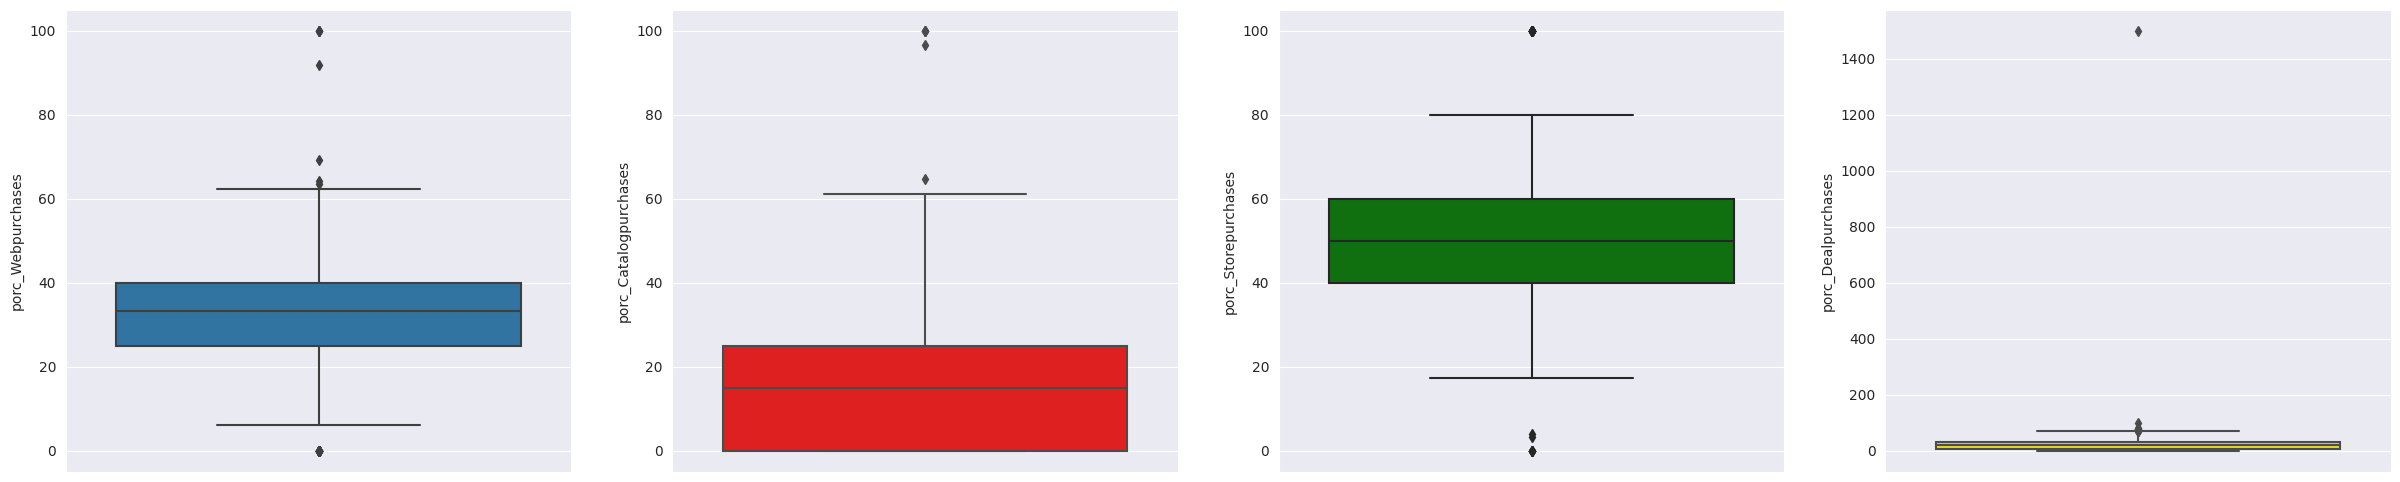

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(1,4,1)
sns.boxplot(y = df_marketing["porc_Webpurchases"])
plt.subplot(1,4,2)
sns.boxplot(y = df_marketing["porc_Catalogpurchases"], color="red")
plt.subplot(1,4,3)
sns.boxplot(y = df_marketing["porc_Storepurchases"], color="green")
plt.subplot(1,4,4)
sns.boxplot(y = df_marketing["porc_Dealpurchases"], color="yellow")
plt.show()

Como vemos, parece ser que hay un error en el total de ventas con descuento porque nos aparece que, en ocasiones, las ventas con descuento   
Superan al número de ventas totales.
Vamos a corregirlo.

In [ ]:
#Vamos a corregir esos datos
#Vamos a crear el filtro para que nos indique las filas cuyas compras con descuento son mayores que las compras totales
filtro = (df_marketing['NumDealsPurchases']>df_marketing['Total_purchases'])
#Creamos un bucle que corrija el error en esos valores
for i in range(df_marketing[filtro].shape[0]):
    indice = (df_marketing[filtro].index)[i]
    df_marketing.loc[indice, 'NumDealsPurchases'] = df_marketing.loc[indice, 'Total_purchases']
    # Creamos de nuevo la columna de porcentaje de compras con descuento
df_marketing['porc_Dealpurchases'] = round(((df_marketing['NumDealsPurchases']/df_marketing['Total_purchases'])*100), 2)

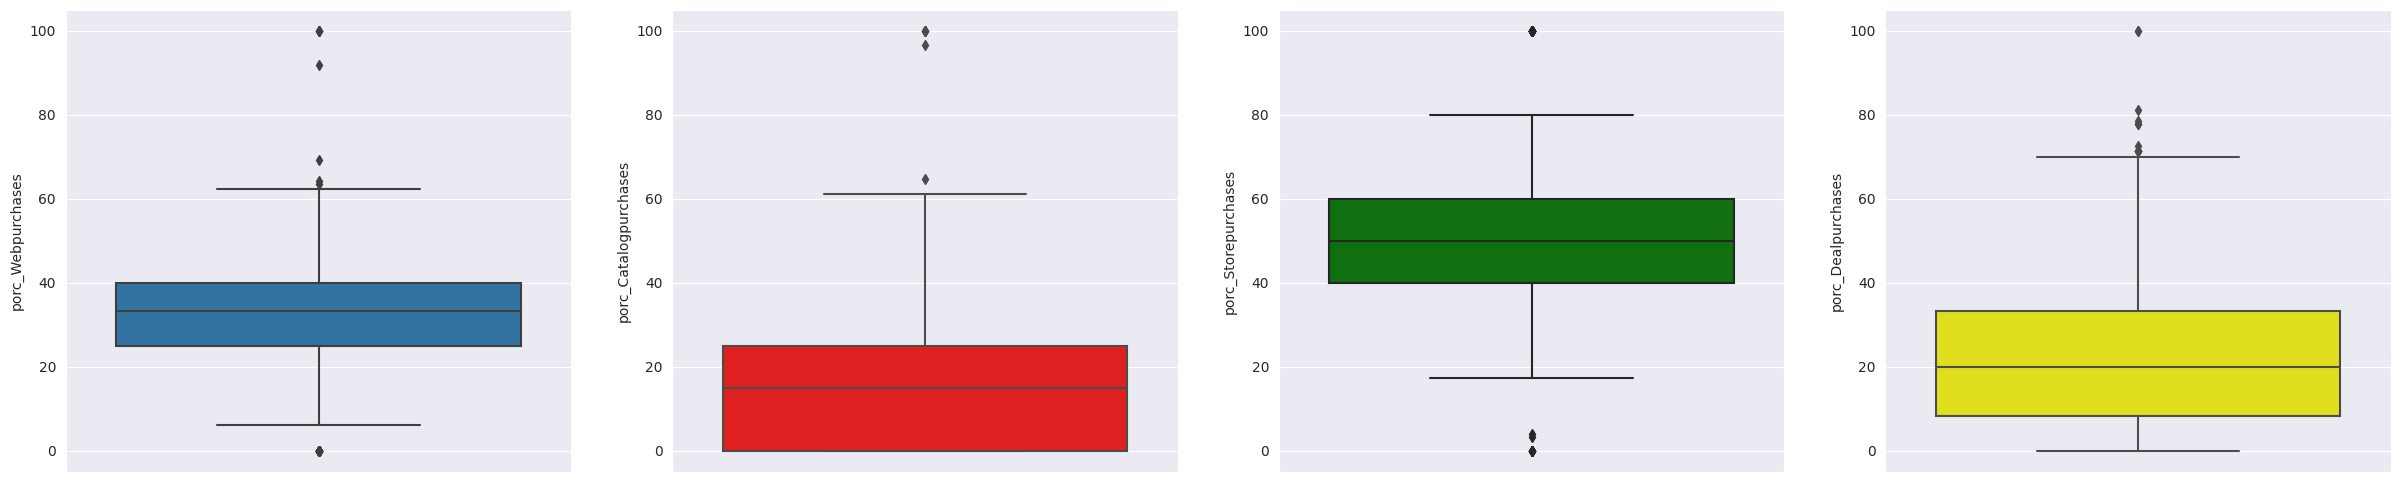

In [ ]:
plt.figure(figsize=(30,6))
plt.subplot(1,4,1)
sns.boxplot(y = df_marketing["porc_Webpurchases"])
plt.subplot(1,4,2)
sns.boxplot(y = df_marketing["porc_Catalogpurchases"], color="red")
plt.subplot(1,4,3)
sns.boxplot(y = df_marketing["porc_Storepurchases"], color="green")
plt.subplot(1,4,4)
sns.boxplot(y = df_marketing["porc_Dealpurchases"], color="yellow")
plt.show()

Como vemos en los boxplots, hay datos atípicos que, de momento no vamos a eliminar

## Preprocesamiento de datos

Creamos un nuevo dataframe donde todas las columnas van a ser numéricas

In [ ]:
df_marketing2 = df_marketing.copy()

In [ ]:
# Conversión de datos de tipo categórico a numérico
df_marketing2["Education"] = df_marketing2["Education"].astype('category').cat.codes
df_marketing2["Marital_Status"] = df_marketing2["Marital_Status"].astype('category').cat.codes
df_marketing2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,porc_Sweet,porc_Wine,porc_Gold,Offspringhome,Years_customer,Total_purchases,porc_Webpurchases,porc_Catalogpurchases,porc_Storepurchases,porc_Dealpurchases
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,3,58138.0,0,0,2012-09-04,58,635,88,...,5.44,39.27,5.44,0,10.79,22,36.36,45.45,18.18,13.64
2174,1954,2,3,46344.0,1,1,2014-03-08,38,11,1,...,3.70,40.74,22.22,2,9.28,4,25.00,25.00,50.00,50.00
4141,1965,2,4,71613.0,0,0,2013-08-21,26,426,49,...,2.71,54.90,5.41,0,9.83,20,40.00,10.00,50.00,5.00
6182,1984,2,4,26646.0,1,0,2014-02-10,26,11,4,...,5.66,20.75,9.43,1,9.36,6,33.33,0.00,66.67,33.33
5324,1981,4,1,58293.0,1,0,2014-01-19,94,173,43,...,6.40,41.00,3.55,1,9.42,14,35.71,21.43,42.86,35.71


In [ ]:
df_marketing.Education.unique()

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

In [ ]:
df_marketing2.Education.unique()

array([2, 4, 3, 1, 0], dtype=int8)

In [ ]:
df_marketing.Marital_Status.unique()

array(['Single', 'Together', 'Married', 'Divorced', 'Widow',
       'Notanswered'], dtype=object)

In [ ]:
df_marketing2.Marital_Status.unique()

array([3, 4, 1, 0, 5, 2], dtype=int8)

Eliminamos la columna DT customer porque ya no la necesitamos y va a dar error en el modelo al no ser numérica
Ya hemos calculado los años que lleva el cliente, por lo que no la necesitamos.

In [ ]:
df_marketing2.pop('Dt_Customer')

ID
5524    2012-09-04
2174    2014-03-08
4141    2013-08-21
6182    2014-02-10
5324    2014-01-19
           ...    
10870   2013-06-13
4001    2014-06-10
7270    2014-01-25
8235    2014-01-24
9405    2012-10-15
Name: Dt_Customer, Length: 2209, dtype: datetime64[ns]

## Creación del modelo de Clustering

In [ ]:
df_marketing2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 5524 to 9405
Data columns (total 42 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             2209 non-null   int64  
 1   Education              2209 non-null   int8   
 2   Marital_Status         2209 non-null   int8   
 3   Income                 2209 non-null   float64
 4   Kidhome                2209 non-null   int64  
 5   Teenhome               2209 non-null   int64  
 6   Recency                2209 non-null   int64  
 7   MntWines               2209 non-null   int64  
 8   MntFruits              2209 non-null   int64  
 9   MntMeatProducts        2209 non-null   int64  
 10  MntFishProducts        2209 non-null   int64  
 11  MntSweetProducts       2209 non-null   int64  
 12  MntGoldProds           2209 non-null   int64  
 13  NumDealsPurchases      2209 non-null   int64  
 14  NumWebPurchases        2209 non-null   int64  
 15  NumCat

### Selección de la mejor k (número de clusters/grupos)

/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/home/fgf/.local/lib/python3.10/site-package

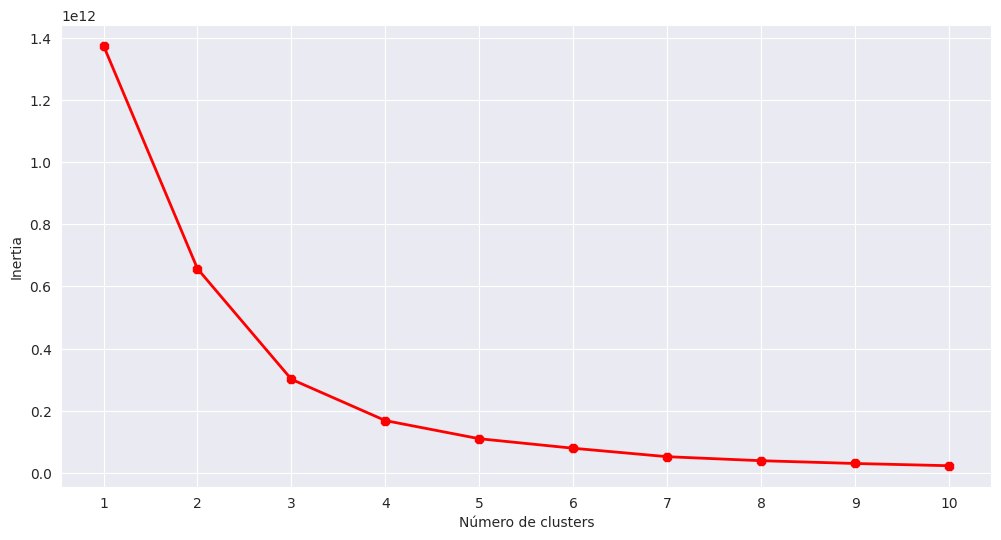

In [ ]:
inertias = []
for k in range (1,11):
    kmeans = KMeans(n_clusters=k)
    kmeans.fit(df_marketing2[df_marketing2.columns])
    inertias.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.plot(range(1,11),inertias,linewidth=2,color='red',marker='8')
plt.xlabel('Número de clusters')
plt.xticks(range(1,11))
plt.ylabel('Inertia')
plt.show()

El valor óptimo de K podríamos decir que es 4.

### Creación del modelo

In [ ]:
km = KMeans(n_clusters=4)
clusters = km.fit_predict(df_marketing2[df_marketing2.columns])
df_marketing2["label"] = clusters

/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


## Visualización de los clusters

In [ ]:
fig = px.scatter_3d(df_marketing2, x='Income', y='Spendings', z='porc_Dealpurchases',
                    color='label',
                    title="3D Scatter Plot")
fig.update_layout(
    autosize=False,
    width=1500,
    height=1300,)

fig.show()

Como es muy difícil interpretar este gráfico, eliminaremos atipicos en la variable Income

## Creación del modelo de Clustering corrigiendo atípicos 

Como vemos, en este ejemplo, el atipico si que es molesto, puesto que le genera un grupo especial. Vamos a corregir ese dato  
Para ello, recortaremos los salarios superiores a los cuartiles .

### Correción de atípicos

Aunque hemos visto atípicos en más variables, solo coregiremos los de la variable Income, que es la que nos desvirtuaba los resultados

In [ ]:
#Creamos una columna para guardar los nuevos valores que le demos a los datos atípicos
df_marketing2['nuevosvalores'] = df_marketing2['Income']
#Con esta variable creamos un df solo con los ingresos
ingresos = df_marketing2[['Income']]
#Calculamos los cuartiles
qs = ingresos.quantile([.25, .5, .75], numeric_only=True).values
q1 = qs[0][0]
q2 = qs[1][0]
q3 = qs[2][0]
# Definir límites inferior y superior, a partir de los cuales los datos serían considerados como atípicos
iqr = q3-q1
iqr_lim_inf = q1 - 1.5*iqr
iqr_lim_sup = q3 + 1.5*iqr
#Aquí le indicamos que cuando encuentre un valor superior al límite que hemos definido, 
#que nos lo reemplace por el valor asignado al límite superior
#Y viceversa
df_marketing2['nuevosvalores'] = df_marketing2['Income'].apply(
        lambda x: iqr_lim_sup if x > iqr_lim_sup else (iqr_lim_inf if x < iqr_lim_inf else x))
#Sustituimos esos nuevos valores en la columna 'Pieces'
df_marketing2['Income'] = df_marketing2['nuevosvalores']
#Y eliminamos la columna auxiliar que no nos va a hacer falta
df_marketing2.pop('nuevosvalores')

ID
5524     58138.0
2174     46344.0
4141     71613.0
6182     26646.0
5324     58293.0
          ...   
10870    61223.0
4001     64014.0
7270     56981.0
8235     69245.0
9405     52869.0
Name: nuevosvalores, Length: 2209, dtype: float64

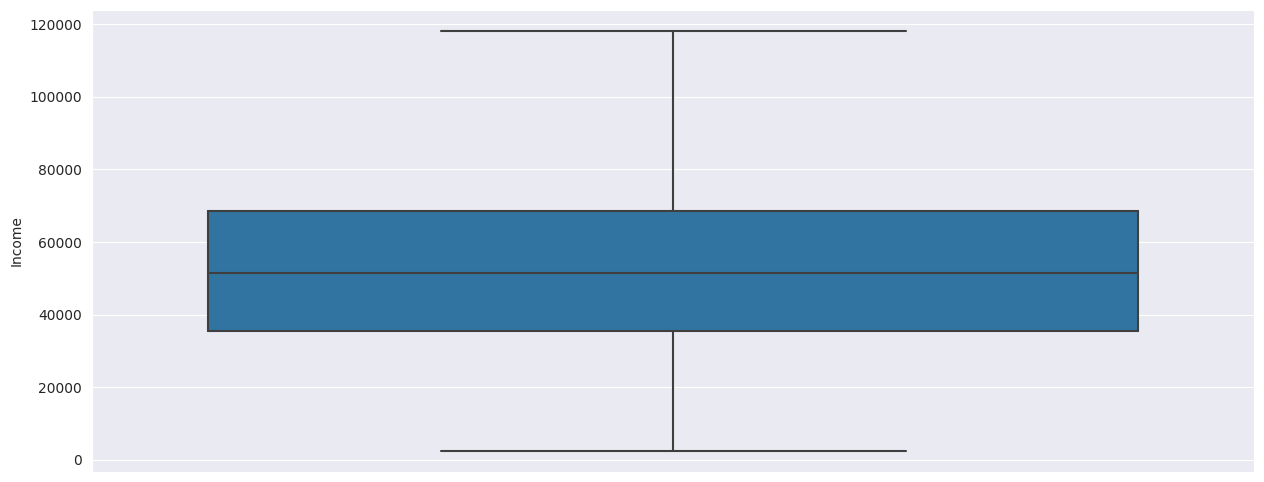

In [ ]:
plt.figure(figsize=(15,6))
sns.boxplot(y = df_marketing2["Income"])
plt.show()

### Selección de la mejor k (número de clusters/grupos)

/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The defaul

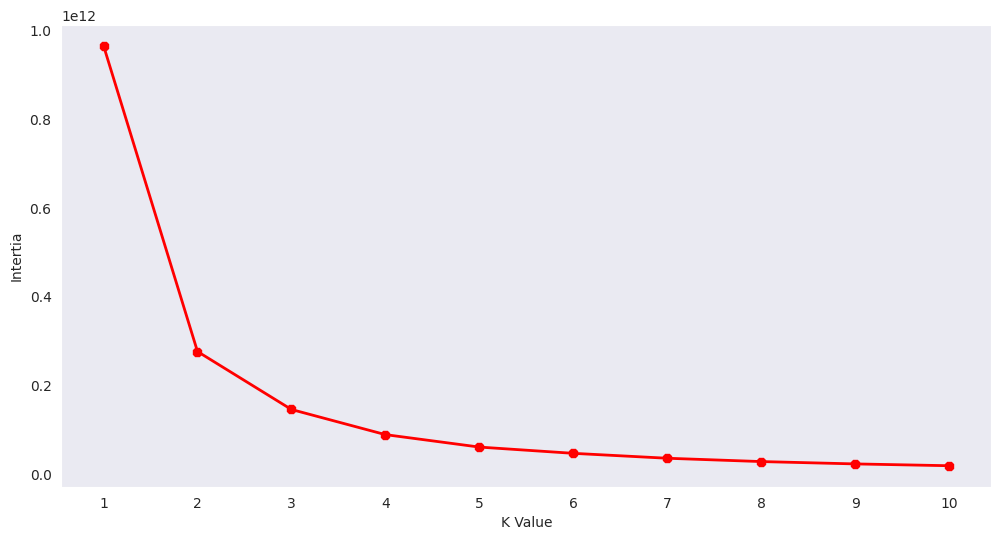

In [ ]:
inertias = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_marketing2[df_marketing2.columns])
    inertias.append(kmeans.inertia_)
    
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11), inertias, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("Intertia")
plt.show()

El valor óptimo de K podríamos decir que es 3.

### Creación del modelo

In [ ]:
km = KMeans(n_clusters=3)
clusters = km.fit_predict(df_marketing2[df_marketing2.columns])
df_marketing2["label"] = clusters

/home/fgf/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning



In [ ]:
df_marketing2.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,...,porc_Wine,porc_Gold,Offspringhome,Years_customer,Total_purchases,porc_Webpurchases,porc_Catalogpurchases,porc_Storepurchases,porc_Dealpurchases,label
ID,,,,,,,,,,,,,,,,,,,,,
5524,1957,2,3,58138.0,0,0,58,635,88,546,...,39.27,5.44,0,10.79,22,36.36,45.45,18.18,13.64,2
2174,1954,2,3,46344.0,1,1,38,11,1,6,...,40.74,22.22,2,9.28,4,25.00,25.00,50.00,50.00,2
4141,1965,2,4,71613.0,0,0,26,426,49,127,...,54.90,5.41,0,9.83,20,40.00,10.00,50.00,5.00,1
6182,1984,2,4,26646.0,1,0,26,11,4,20,...,20.75,9.43,1,9.36,6,33.33,0.00,66.67,33.33,0
5324,1981,4,1,58293.0,1,0,94,173,43,118,...,41.00,3.55,1,9.42,14,35.71,21.43,42.86,35.71,2


In [ ]:
df_marketing2.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2209 entries, 5524 to 9405
Data columns (total 43 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Year_Birth             2209 non-null   int64  
 1   Education              2209 non-null   int8   
 2   Marital_Status         2209 non-null   int8   
 3   Income                 2209 non-null   float64
 4   Kidhome                2209 non-null   int64  
 5   Teenhome               2209 non-null   int64  
 6   Recency                2209 non-null   int64  
 7   MntWines               2209 non-null   int64  
 8   MntFruits              2209 non-null   int64  
 9   MntMeatProducts        2209 non-null   int64  
 10  MntFishProducts        2209 non-null   int64  
 11  MntSweetProducts       2209 non-null   int64  
 12  MntGoldProds           2209 non-null   int64  
 13  NumDealsPurchases      2209 non-null   int64  
 14  NumWebPurchases        2209 non-null   int64  
 15  NumCat

## Visualización de los clusters

In [ ]:
fig = px.scatter_3d(df_marketing2, x='Income', y='Spendings', z='porc_Dealpurchases',
                    color='label',
                    title="3D Scatter Plot")
fig.update_layout(
    autosize=False,
    width=1000,
    height=800,)

fig.show()

Como podemos ver, el modelo no es el más óptimo posible  
Se ha intentado ver cuales son las variables para subdividir grupos en función del número total de compras que realizan.  
A la vista de este modelo observamos 3 grupos:  
- Los que gastan menos de 500 al año tienen un salario anual menor de 20.000. Es poco frecuente encontrar a individuos de este grupo que  
no hayan aplicado descuentos en al menos un 20% de las compras. 
- Los que tienen un salario anual entre 40.000 y 60.000. En este grupo, comenzamos a encontrar, con más frecuencia, personas que hayan  
realizado más del 90% de las compras sin ningún tipo de descuento, aunque se encuentran, individuos que aplican descuentos en el 60% de sus  
compras. Este grupo se encuentra más personas que gastan más de 500 al año
- Los que tienen un salario anual mayor a 60.000, el cuál suele gastar más de 500. Con respecto a los grupos anteriores, existen individuos que  
han gastado más de 2000 al año. Suelen utilizar descuentos en menos del 20% de sus compras  

  
  
No obstante, al no haber borrado los atipicos y al haberlos incluido en la primera predición, tenemos una información más.   
Estos tres grupos ya nos habían salido en el modelo anterior, pero a parte nos había salido un 4 grupo, el cual son las personas con un salario increíblemente alto   
(los atípicos), que de vez en cuando compran en nuestras tiendas, pero no mucha cantidad. Esto puede suceder, porque normalmente estas personas compran en  
tiendas de más categoría y solo acuden de vez en cuando a nuestros canales de venta.